# Project Foundations for Data Science: FoodHub Data Analysis
#### By: [**_Luis Carlos Arenas Sanchez_**]

## Importing required libraries

In [403]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Structure of the dataset


In [397]:
# Read the csv file and show the first 5 rows.
df = pd.read_csv('foodhub_order.csv')
df.head()


Number is Even


**Observations:**
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### Question 1: How many rows and columns are present in the data?

In [373]:
# Show the number of rows and columns.
shape = df.shape
print('There are {} rows and {} columns.'.format(shape[0], shape[1]))

There are 1898 rows and 9 columns.


**Observations:** The dataset has 1898 rows and 9 columns.

### Question 2: What are the datatypes of the different columns in the dataset?

In [374]:
# Get the data types of the columns.
types = df.dtypes
print(types)

# Print the different datatypes in the data set.
unique_types = types.groupby(types).unique()
print('\nThese are the different datatypes in the data set:', unique_types)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

These are the different datatypes in the data set: int64        [int64]
float64    [float64]
object      [object]
dtype: object


**Observations:** The datatypes of the different columns are: int64, float64, object

### Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method.

In [375]:
# Get the information of the data set.
info = df.info()
print(info)
# Identify missing values.
missing_values = df.isnull().sum()
print('There are {} columns that have missing values.'.format(len(missing_values[missing_values > 0])))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None
There are 0 columns that have missing values.


**Observations:** There are no missing values in the data. No need to treat missing values.

### Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [376]:
# Minimum food preparation time.
min_prep_time = df['food_preparation_time'].min()
print('The minimum food preparation time is {}.'.format(min_prep_time))

# Average food preparation time.
avg_prep_time = df['food_preparation_time'].mean()
print('\nThe average food preparation time is {}.'.format(round(avg_prep_time, 2)))

# Maximum food preparation time
max_prep_time = df['food_preparation_time'].max()
print('\nThe maximum food preparation time is {}.'.format(max_prep_time))



The minimum food preparation time is 20.

The average food preparation time is 27.37.

The maximum food preparation time is 35.


**Observations:**  Minimun food preparation time is 20 minutes, average food preparation time is 27.37 minutes and maximum food preparation time is 35 minutes.

### Question 5: How many orders are not rated?

In [377]:
# Check not rated orders.
not_rated_orders = df[df['rating'] == 'Not given']
print('There are {} orders that are not rated.'.format(len(not_rated_orders)))

There are 736 orders that are not rated.


**Observations:**  736 orders are not rated.

## Exploratory Data Analysis (EDA)

#### (Univariate Analysis)

### Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

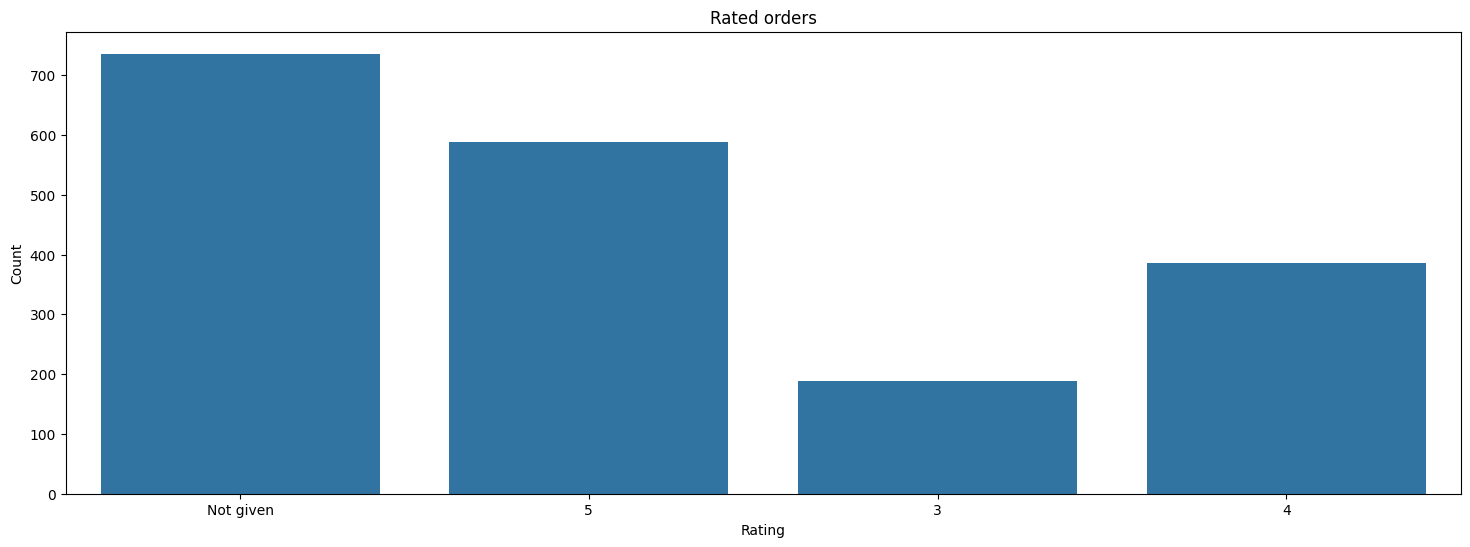

/var/folders/bz/f34hfrkd6jzf52qct9fylft80000gn/T/ipykernel_28148/992606799.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cuisine_type', y='food_preparation_time', data=df, inner='quart', palette='Set3')


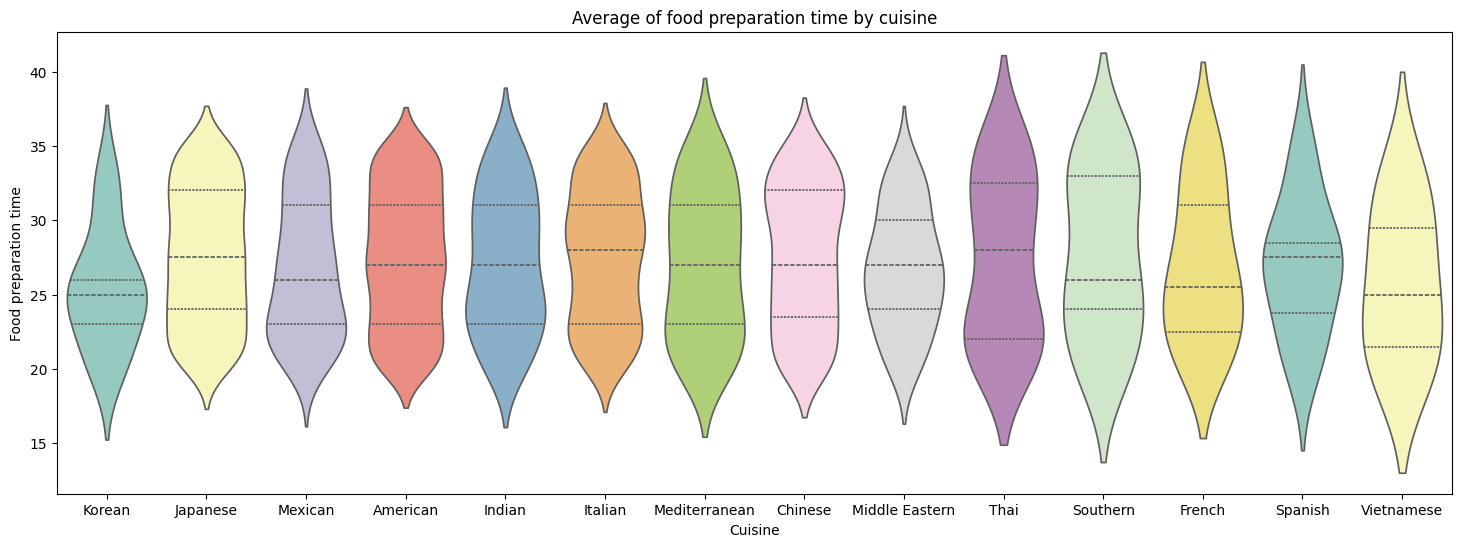

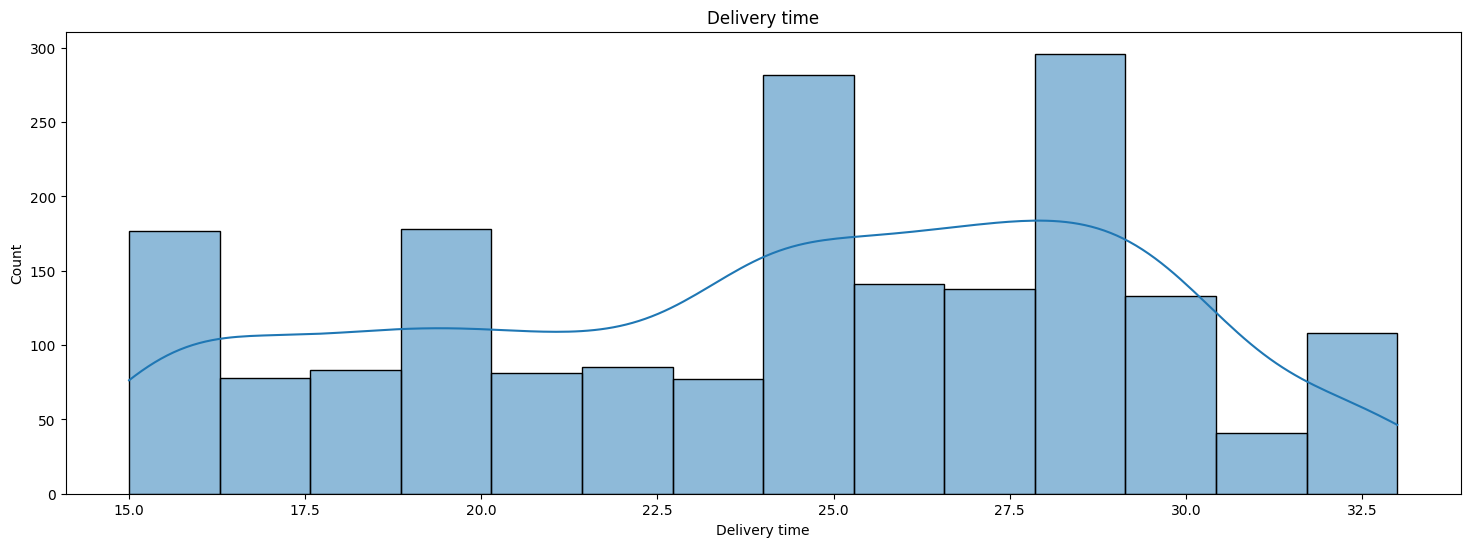

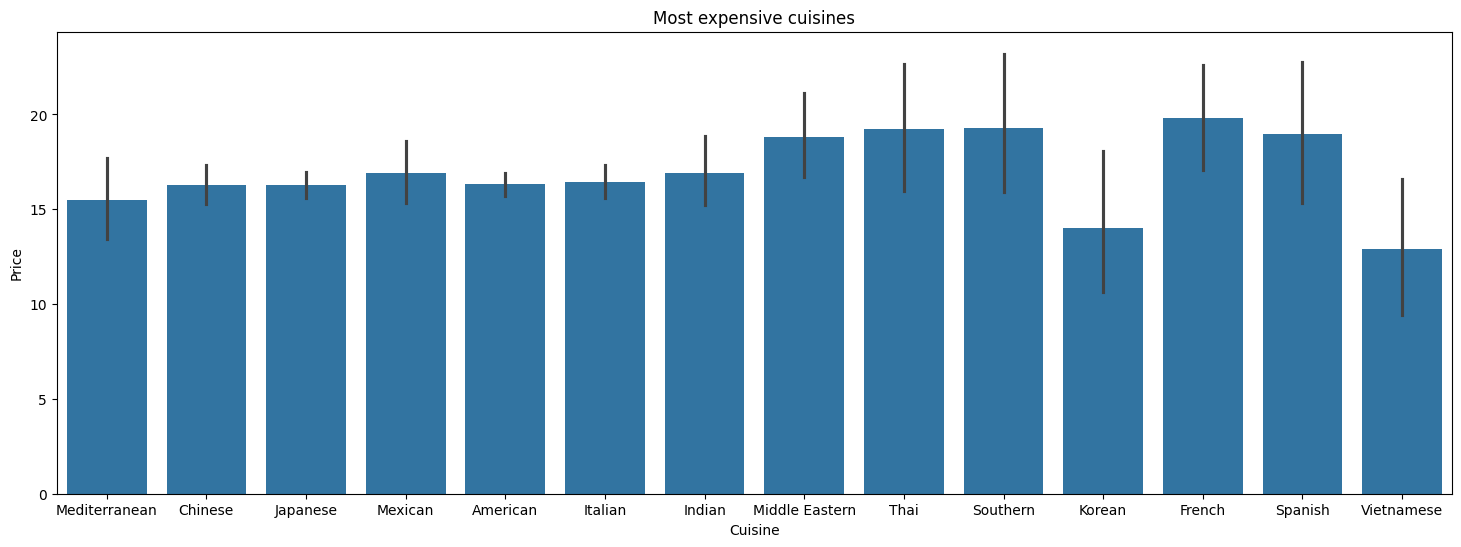

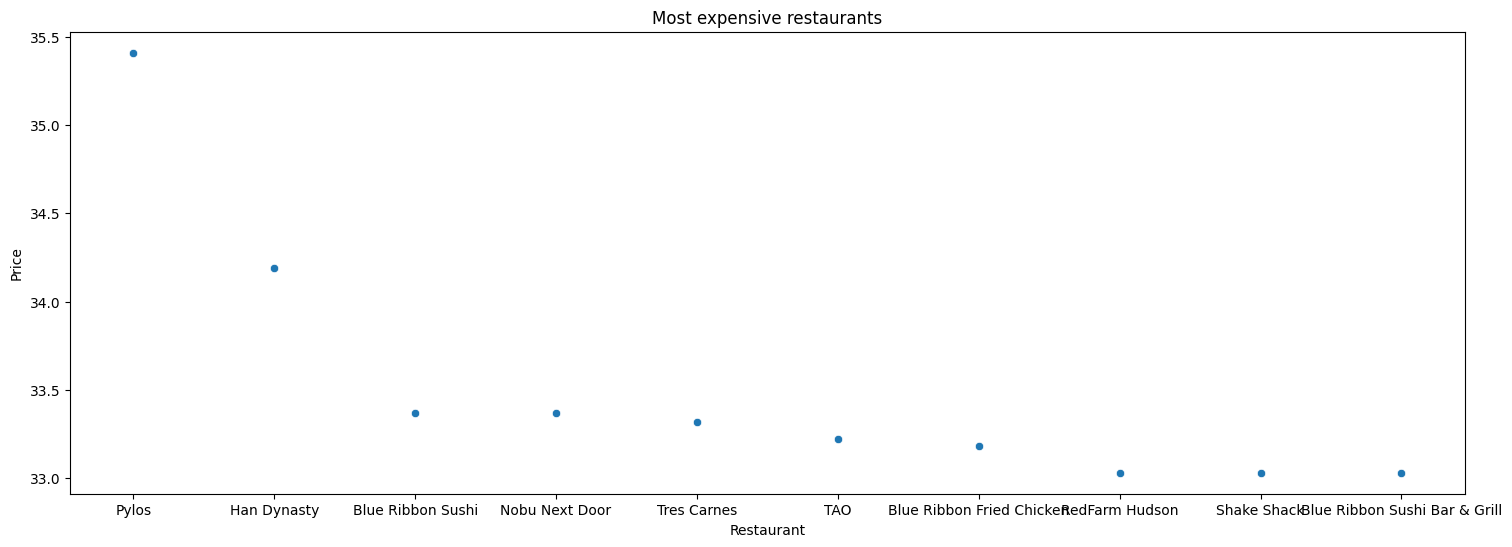

/Users/carlosarenas/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/carlosarenas/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


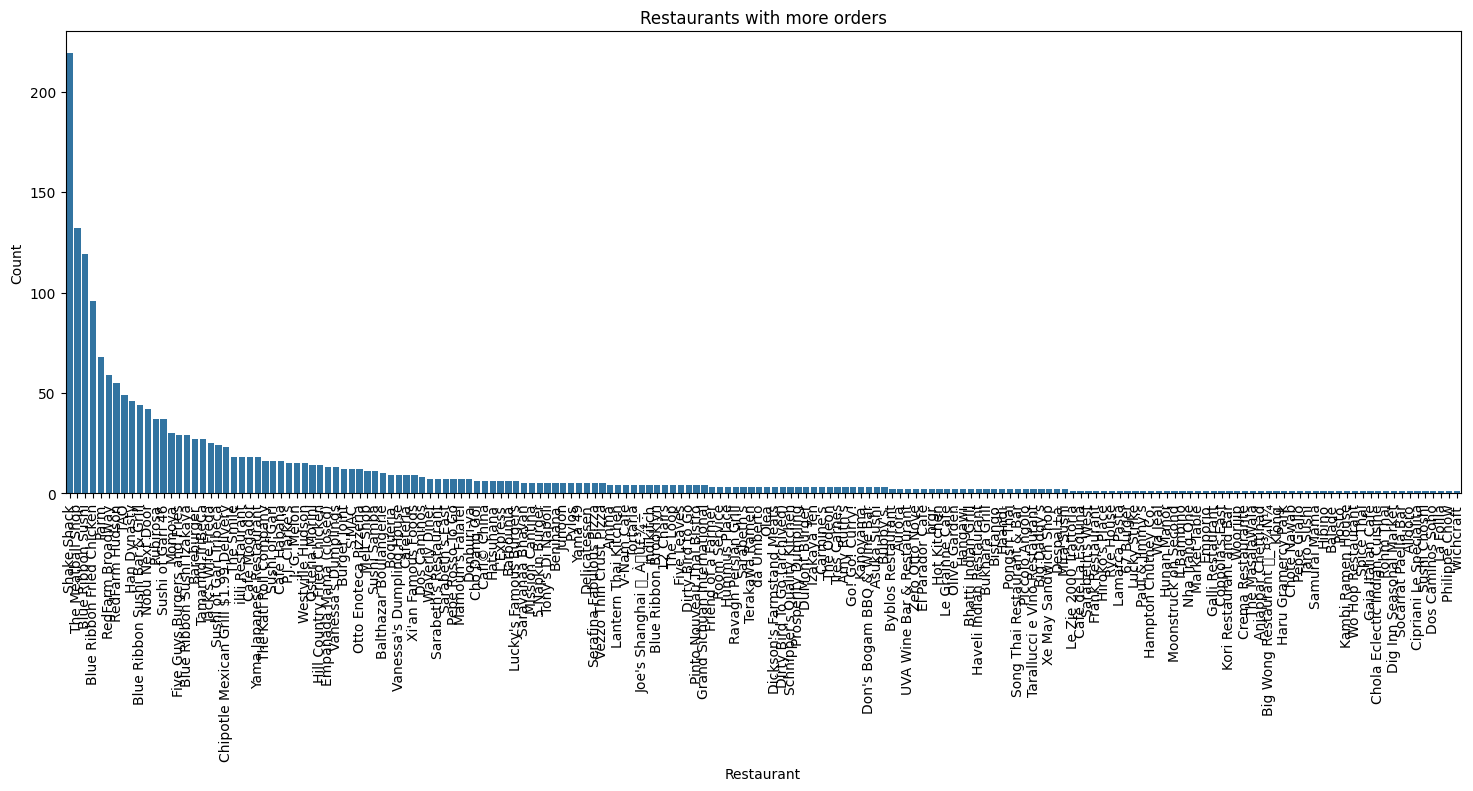

<Figure size 1800x600 with 0 Axes>

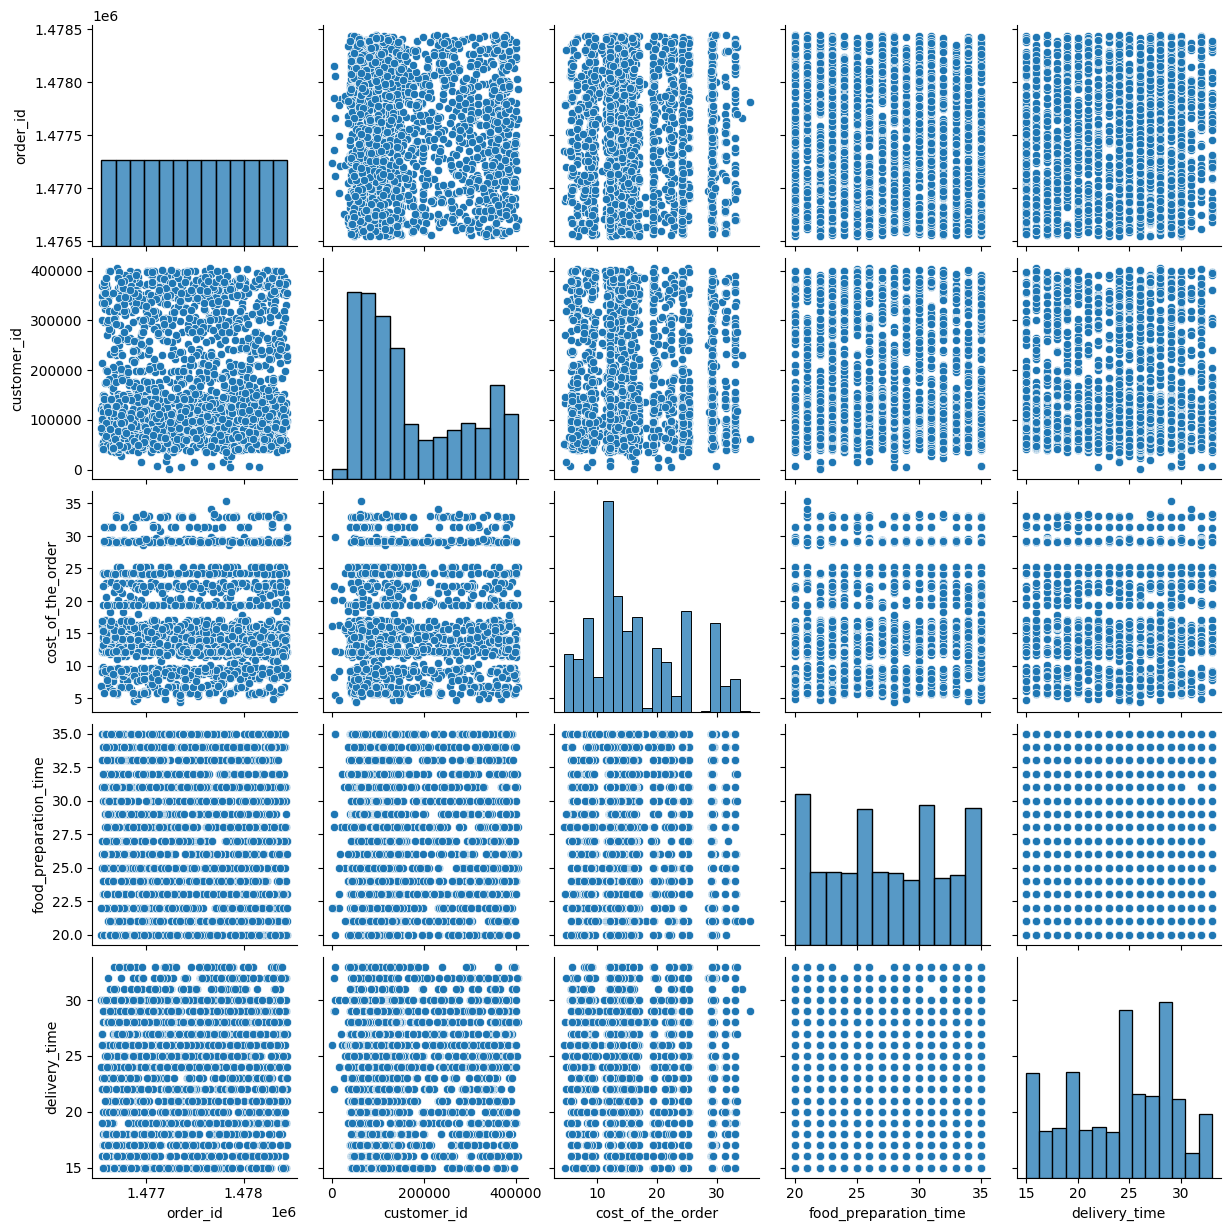

In [378]:

# Plot the rated orders 
plt.figure(figsize=(18, 6))
sns.countplot(x='rating', data=df)
plt.title('Rated orders')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



# Violin plot of the average of food preparation time by cuisine.
plt.figure(figsize=(18, 6))
sns.violinplot(x='cuisine_type', y='food_preparation_time', data=df, inner='quart', palette='Set3') 
plt.title('Average of food preparation time by cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Food preparation time')
plt.show()

# Histogram of the delivery time.
plt.figure(figsize=(18, 6))
sns.histplot(df['delivery_time'], kde=True)
plt.title('Delivery time')
plt.xlabel('Delivery time')
plt.ylabel('Count')
plt.show()



# Pie chart of the most expensive cuisines.
plt.figure(figsize=(18, 6))
sns.barplot(y='cost_of_the_order', x='cuisine_type', data=df.sort_values('cost_of_the_order', ascending=False))
plt.title('Most expensive cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Price')
plt.show()

# Scatterplot of the 10 most expensive restaurants.
plt.figure(figsize=(18, 6))
sns.scatterplot(x='restaurant_name', y='cost_of_the_order', data=df.sort_values('cost_of_the_order', ascending=False).head(10))
plt.title('Most expensive restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Price')
plt.show()

# chart with more orders.
plt.figure(figsize=(18, 6))
sns.countplot(x='restaurant_name', data=df, order=df['restaurant_name'].value_counts().index)
plt.title('Restaurants with more orders')
plt.xlabel('Restaurant')
plt.ylabel('Count')
plt.xticks(rotation=90)


# Pairplot of the data set.
plt.figure(figsize=(18, 6))
sns.pairplot(df)
plt.show()






**Observations:**
- There is more not rated orders than rated orders.
- The Thai cuisine takes more time to be prepared than the other cuisines.
- The regular time of delivery is about 25 minutes.
- The most expensive cuisines are French and Middle Eastern, with an average of $25 per meal.
- The least expensive cuisines on the chart are Thai and Vietnamese.
- The most expensive meal is from the Pylos restaurant, with a price of $35.41.
- The restaurant with more orders is the Shake Shack restaurant wit more than 120 orders.




### Question 7: Which are the top 5 restaurants in terms of the number of orders received?

In [379]:
# Top 5 restaurants with most occurences
top_5_restaurants = df['restaurant_name'].value_counts().head()
print('The top 5 restaurants with most orders are:\n', top_5_restaurants)


The top 5 restaurants with most orders are:
 restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


**Observations:**  The top 5 restaurants with most orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

### Question 8: Which is the most popular cuisine on weekends?

In [380]:

# Get the weekend orders.
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Group by cusine and count the number of orders.
most_pupular_cusine = weekend_orders.groupby('cuisine_type').size()

# Get the cusine with most orders on weekends.
most_pupular_cusine = most_pupular_cusine.sort_values(ascending=False).index[0]

print('The most popular cusine on weekends is:', most_pupular_cusine)


The most popular cusine on weekends is: American


**Observations:**  The most popular cuisine on weekends is American.

### Question 9: What percentage of the orders cost more than 20 dollars?

In [395]:
# Get the orders cost.
order_cost = df['cost_of_the_order']

# Total of orders divided by the order cost > 20.
total_orders = len(order_cost)
orders_over_20 = len(order_cost[order_cost > 20])

# Get percentage of orders over 30.
percentage = orders_over_20 / total_orders * 100
print('The percentage of orders over 20 is {}%.'.format(round(percentage, 2)))

The percentage of orders over 20 is 30.64%.


**Observations:**  30.64% of the orders cost more than 20 dollars.

### Question 10: What is the mean order delivery time?

In [382]:
# Sort delivery time.
sort_delivery_time = df['delivery_time'].sort_values()

# Get the mean delivery time.
mean_delivery_time = sort_delivery_time.mean()

print('The mean of order delivery time is {}:'.format(mean_delivery_time))

The mean of order delivery time is 24.161749209694417:


**Observations:**  The mean order delivery time is 24.16 minutes.

### Question 11: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [383]:
# Get 3 customers with the most orders
top_3_customers = df['customer_id'].value_counts().head(3)

print('The top 3 customers with most orders are:\n', top_3_customers)

The top 3 customers with most orders are:
 customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


**Observations:**  The IDs of the top 3 most frequent customers are 52832 with 13 orders, 47440 with 10 orders and 83287 with 9 orders.

#### (Multivariate Analysis)

### Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

                mean_rating
Spanish            4.833333
Thai               4.666667
Indian             4.540000
Mexican            4.416667
Japanese           4.373626
Italian            4.360465
Chinese            4.338346
Southern           4.307692
French             4.300000
American           4.298913
Middle Eastern     4.235294
Mediterranean      4.218750
Korean             4.111111
Vietnamese         4.000000


/var/folders/bz/f34hfrkd6jzf52qct9fylft80000gn/T/ipykernel_28148/1992014540.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cusine_rating['rating'] = pd.to_numeric(cusine_rating['rating'])


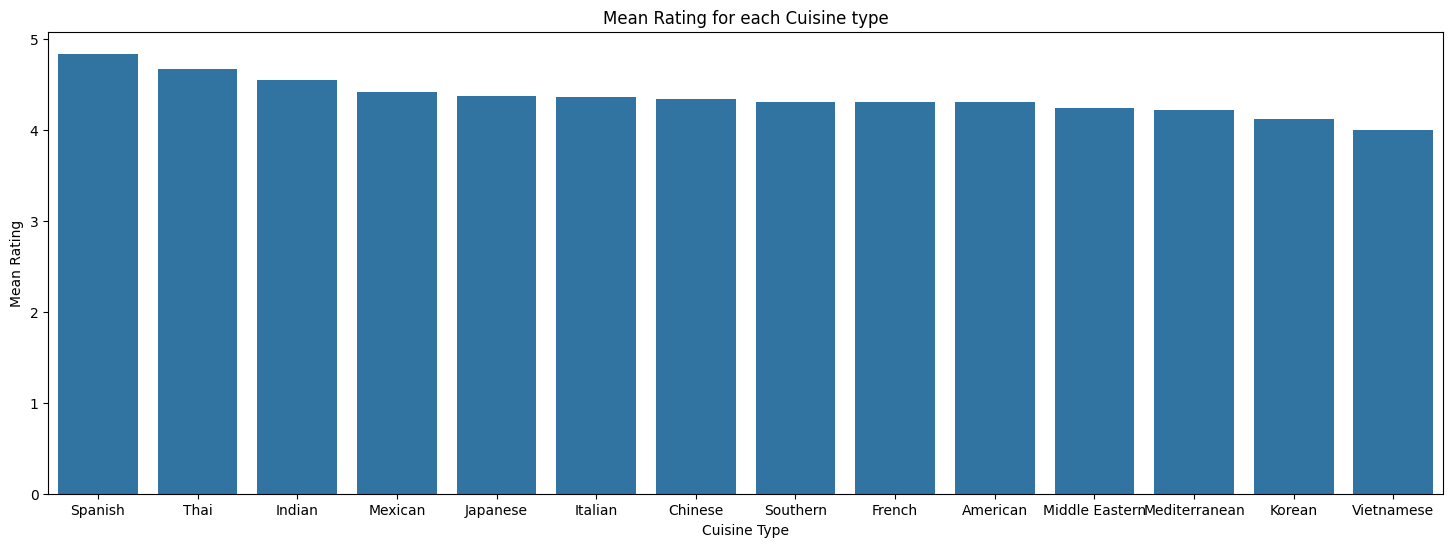

Detailed data count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64.
The mode of the cost of the order is 12.18.


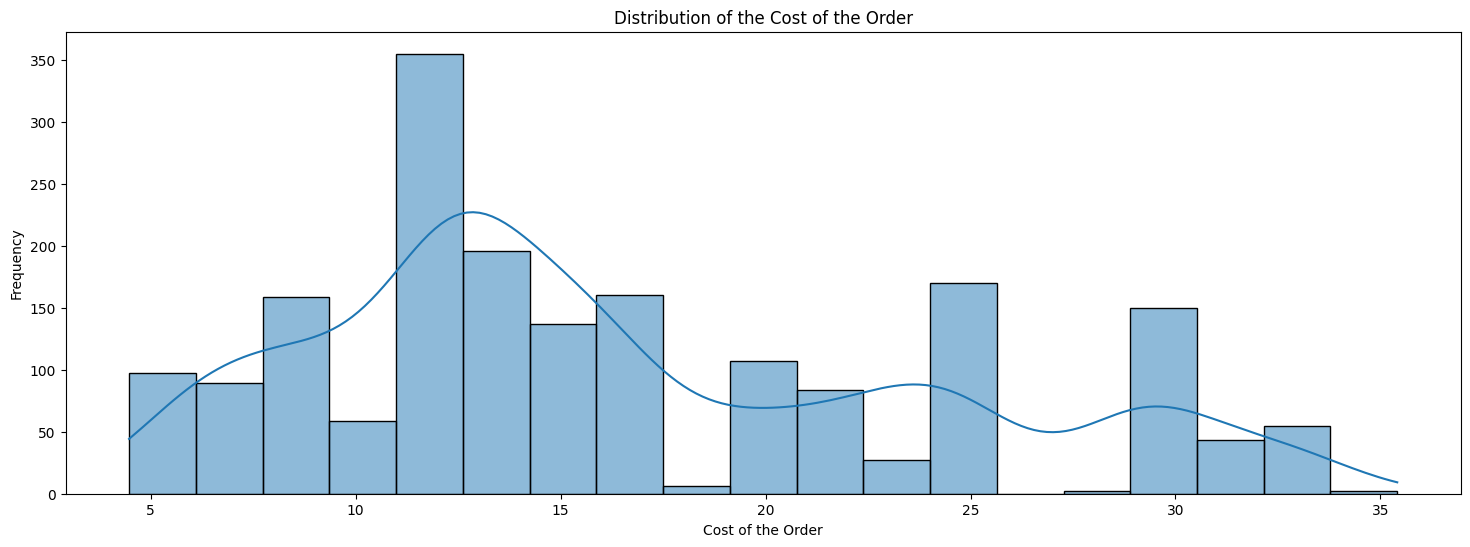

In [384]:


# Get the unique cuisine types.
cusine_types = df['cuisine_type'].unique()

# Het the cuisine type and rating columns.
cusine_rating_types = df[['cuisine_type', 'rating']]

# Drop the rows with Not given rating.
cusine_rating = cusine_rating_types[cusine_rating_types['rating'] != 'Not given']

# Convert the rating to numeric.
cusine_rating['rating'] = pd.to_numeric(cusine_rating['rating'])

# Create a dictionary to store the mean rating for each cuisine type.
mean_rating = {}

# Loop through the cuisine types.
for cusine in cusine_types:
    # Get the mean rating for each cuisine type
    mean_rating[cusine] = cusine_rating[cusine_rating['cuisine_type'] == cusine]['rating'].mean()

# Convert the dictionary to a data frame.
mean_rating = pd.DataFrame.from_dict(mean_rating, orient='index', columns=['mean_rating'])

# Sort the values.
mean_rating = mean_rating.sort_values(by='mean_rating', ascending=False)
print(mean_rating)

# Plot the mean rating for each cuisine type.
plt.figure(figsize=(18, 6))
sns.barplot(x=mean_rating.index, y=mean_rating['mean_rating'])
plt.title('Mean Rating for each Cuisine type')
plt.xlabel('Cuisine Type')
plt.ylabel('Mean Rating')
plt.show()


# ******************************************************

# Get the cuisine type and cost of the order columns.
cusine_price = df[['cuisine_type', 'cost_of_the_order']]

# Create a dictionary to store the mean price for each cuisine type.
mean_price = {}

# Describe the information between cuisine type and cost.
describe_price = cusine_price['cost_of_the_order'].describe()
mode_price = cusine_price['cost_of_the_order'].mode()

# What is the mode of the cost of the order
print('Detailed data {}.'.format(describe_price))
print('The mode of the cost of the order is {}.'.format(mode_price[0]))

# plote the distribution of the cost of the order
plt.figure(figsize=(18, 6))
sns.histplot(cusine_price['cost_of_the_order'], kde=True)
plt.title('Distribution of the Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()




**Observations:** 
 
Relations between numerical variables:
 * The best rating is the Spanish cuisine with 4.8 stars. The worst rating is the Vietnamese cuisine with 4 stars. 
 * The mode of the cost of the order is 12.13 dollars.

### Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [385]:
# Remove the rating not given.
df = df[df['rating'] != 'Not given']

# Convert rating to numeric.
df['rating'] = pd.to_numeric(df['rating'])

# Get the restaurants with more ocurrences.
restaurants = df['restaurant_name'].value_counts()

# Get the restaurants with more than 50 orders with the restaurant name as the index.
top_restaurants = restaurants[restaurants > 50]
print('Restaurants with more than 50 orders: {}'.format(top_restaurants))


# List of the top restaurants with rating greater than 4

rate_of_top_restaurants = df[df['restaurant_name'].isin(top_restaurants.index)]

# Unique restaurants
unique_restaurants = rate_of_top_restaurants['restaurant_name'].unique()

# Rating of the unique restaurants
unique_restaurants = rate_of_top_restaurants.groupby('restaurant_name')['rating'].mean()
print('Restaurants with more than 50 orders and a rating greater than 4: {}'.format(unique_restaurants))







Restaurants with more than 50 orders: restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
Name: count, dtype: int64
Restaurants with more than 50 orders and a rating greater than 4: restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64


**Observations:** There are 4 restaurants that fulfill the criteria to get the promotional offer. These restaurants are: 
* Shake Shack                 with ***133*** orders and ***4.2 stars***
* The Meatball Shop           with ***84***  orders and ***4.5 stars***
* Blue Ribbon Sushi           with ***73***  orders and ***4.2 stars***
* Blue Ribbon Fried Chicken   with ***64***  orders and ***4.3 stars***


### Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [386]:
# Get the orders with a cost greater than 20 and sum the cost of the orders.
orders_over_20 = df[df['cost_of_the_order'] > 20].sum()['cost_of_the_order']
print('Orders with a cost greater than 20: {}'.format(orders_over_20))

# Get the 25% for the orders over 20.
net_woth_25 = orders_over_20 * 0.25
print('The net worth for orders over 20 dollars is: {}'.format(net_woth_25))

# Get the orders with a cost less than 20 and more than 5 and sum the cost of the orders.
orders_less_20 = df[(df['cost_of_the_order'] < 20) & (df['cost_of_the_order'] > 5)].sum()['cost_of_the_order']
print('Orders with a cost less than 20: {}'.format(orders_less_20))

# Get the 15% for the orders less than 20.
net_woth_15 = orders_less_20 * 0.15
print('The net worth for orders less than 20 dollars is: {}'.format(net_woth_15))

print('The total net worth is: {}'.format(net_woth_15 + net_woth_25))





Orders with a cost greater than 20: 9491.76
The net worth for orders over 20 dollars is: 2372.94
Orders with a cost less than 20: 9950.880000000001
The net worth for orders less than 20 dollars is: 1492.632
The total net worth is: 3865.572


**Observations:** The net revenue generated by the company across all orders is 3865.572 dollars.

### Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [387]:
# Get the time of the preparation of the food.
food_preparation_time = df['food_preparation_time']

# Get the delivery time of the order.
delivery_time = df['delivery_time']

# Get the total time of the order.
total_time = food_preparation_time + delivery_time

# Get the orders that takes more than 60 minutes.
orders_over_60 = total_time[total_time > 60]

# Get the percentage of orders that takes more than 60 minutes.
percentage = len(orders_over_60) / len(total_time) * 100

print('The percentage of orders that takes more than 60 minutes is: {}%'.format(round(percentage, 2)))


The percentage of orders that takes more than 60 minutes is: 10.24%


**Observations:**  10.24% of the orders take more than 60 minutes to get delivered from the time the order is placed.

### Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [388]:
# Get the mean of the delivery time of the orders on weekdays.
weekdays = df[df['day_of_the_week'] == 'Weekday']
mean_weekdays = weekdays['delivery_time'].mean()
print('The mean of the delivery time of the orders on weekdays is: {}'.format(round(mean_weekdays, 2)))

# Get the mean of the delivery time of the orders on weekends.
weekends = df[df['day_of_the_week'] == 'Weekend']
mean_weekends = weekends['delivery_time'].mean()
print('The mean of the delivery time of the orders on weekends is: {}'.format(round(mean_weekends, 2)))



The mean of the delivery time of the orders on weekdays is: 28.31
The mean of the delivery time of the orders on weekends is: 22.44


**Observations:**  The mean of the delivery time of the orders on weekdays is greater than the mean of the delivery time of the orders on weekends.

## Conclusion and Recommendations

### Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

Based on the analysis, I would recommend the following:

**Based on cuisine type:**
* The company should focus on the American cuisine, which is the most popular cuisine.
* The company should check the Vietnamese cuisine, which is the least popular cuisine and give them more visibility.

**Based on feedback ratings:**
* The company should focus on the Spanish cuisine, which is the best rated cuisine, and give incentives to the restaurants that offer this cuisine. To have more restaurants offering this cuisine.
* The company should check the Vietnamese and Korean cuisines, which are the worst rated cuisines, and try to improve their service or food quality.


**General recommendations:**
* The company should focus on the restaurants with the highest number of orders and the highest ratings, and give them the promotional offer.
* The company should check the restaurants with the lowest ratings and try to improve their service.
* The company should Improve the delivery time of the orders on weekdays.

## Conclusion

In this project, I have analyzed the FoodHub dataset and provided recommendations to help improve the business. Analyzing the dataset, I have found that the company should focus on the American cuisine, which is the most popular cuisine. The company should check the Vietnamese cuisine, which is the least popular cuisine and give them more visibility. The company should focus on the Spanish cuisine, which is the best rated cuisine, and give incentives to the restaurants that offer this cuisine. To have more restaurants offering this cuisine. The company should check the Vietnamese and Korean cuisines, which are the worst rated cuisines, and try to improve their service or food quality. The company should focus on the restaurants with the highest number of orders and the highest ratings, and give them the promotional offer. The company should check the restaurants with the lowest ratings and try to improve their service. The company should Improve the delivery time of the orders on weekdays.

The net worth of the company is 3865.572 dollars. Which is not so much, based on the infrastructure to mount a business like this. The company should create a strategy to increase the net worth of the company, maybe by increasing the number of orders or increasing the cost of the orders. However, if they increase the cost of the orders, they should check the impact on the number of orders.


### References

Foundations for Data Science from My Great Learning

* [Pandas Documentation](https://pandas.pydata.org/docs/)
* [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
* [Seaborn Documentation](https://seaborn.pydata.org/tutorial.html)
* [Stack Overflow](https://stackoverflow.com/)
* [GeeksforGeeks](https://www.geeksforgeeks.org/)
